## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
no_of_rows = df.shape[0]
no_of_rows

294478

c. The number of unique users in the dataset.

In [4]:
unique = df['user_id'].unique()
len(unique)

290584

d. The proportion of users converted.

In [5]:
# we can find proportion of users converted by taking mean since values are 1 and 0# we ca 
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
len(df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')])

3893

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Answer**: No, none of the rows have missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) & ((df['group'] == 'control') == (df['landing_page'] == 'old_page'))]

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
duplicate = df2[df2['user_id'].duplicated()]
print(duplicate)

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


c. What is the row information for the repeat **user_id**? 

In [15]:
print ( "The row information is given below:")
duplicate

The row information is given below:


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2 = df2[df2.timestamp != '2017-01-14 02:55:59.590927']

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
converted = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print ("probability of the individual converted regardless of the page: ",converted)

probability of the individual converted regardless of the page:  0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control_grp = df2.query('group == "control"')
control_grp_prop = len(control_grp.query('converted == 1'))/len(control_grp)
print ("probablility of the control group converted: ", control_grp_prop)

probablility of the control group converted:  0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment_grp = df2.query('group == "treatment"')
treatment_grp_prop = len(treatment_grp.query('converted == 1'))/len(treatment_grp)
print ("probablility of the treatment group converted: ", treatment_grp_prop)

probablility of the treatment group converted:  0.11880806551510564


d. What is the probability that an individual received the new page?

In [20]:
landing_new_page = len(df2[df2['landing_page'] == 'new_page'])/len(df2)
obs_diff = treatment_grp_prop - control_grp_prop 
print ("probability that an individual received the new page: ",landing_new_page) 
print ("observation difference: ", obs_diff)

probability that an individual received the new page:  0.5000619442226688
observation difference:  -0.0015782389853555567


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.


**Evidence that one page leads to more conversions?**

1.Given that an individual was in the treatment group, the probability they converted is 0.118807


2.Given that an individual was in the control group, the probability they converted is 0.120386


3.We find that old page does better, but by a very tiny margin.


4.Change aversion, test span durations and other potentially influencing factors are not accounted for. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### Null Hypothesis:
In null hypothesis the old page is considered to be better or equal to the new page (new <= old) 
### Alternative Hypothesis:
In the alternate hypothesis it is assumed that the new_page is better than the old page (new > old) .


## Hypothesis

$H_{0}$ : $p_{old}$ >=  $p_{new}$
$H_{1}$ : $p_{old}$ <  $p_{new}$


In other words,


$H_{0}$ : $p_{new}$ <= $p_{old}$
$H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print (p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = len(df2[df2['converted'] == 1])/ len(df2['user_id'])
print (p_old)

0.11959708724499628


c. What is $n_{new}$?

In [23]:
n_new = len(df2[df2['landing_page'] == 'new_page'])
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = len(df2[df2['landing_page'] == 'old_page'])
print (n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#new_page_converted = df2[df2['landing_page'] == 'new_page']
new_page_converted = np.random.binomial(n_new,p_new,10000)/n_new
print (new_page_converted)

[ 0.11765192  0.11964077  0.11946184 ...,  0.11975776  0.11901452
  0.12150575]


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#old_page_converted = df2[df2['landing_page'] == 'old_page']
old_page_converted = np.random.binomial(n_old,p_old,10000)/n_old
print (old_page_converted)

[ 0.12014538  0.11906466  0.12101959 ...,  0.11909908  0.12020045
  0.12142572]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_diffs = new_page_converted - old_page_converted
p_diffs

array([ -2.49346386e-03,   5.76103999e-04,  -1.55775036e-03, ...,
         6.58677538e-04,  -1.18592813e-03,   8.00266609e-05])

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
p_diffs = []
for _ in range(10000) :
    #bootsample = df2.sample(200, replace= True)
    #a= bootsample[(bootsample['landing_page'] == 'new_page') & (bootsample['converted'] == 1)]
    #b= bootsample[(bootsample['landing_page'] == 'old_page') & (bootsample['converted'] == 1)]
    new_page_converted = np.random.binomial(n_new,p_new,1)/n_new
    old_page_converted = np.random.binomial(n_old,p_old,1)/n_old
    p_diffs.append(new_page_converted - old_page_converted)     

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

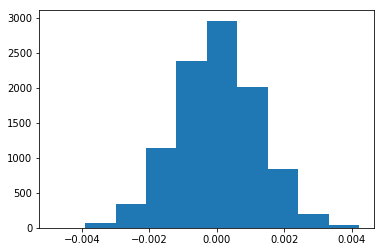

In [29]:
p_diffs = np.array(p_diffs)
#Sampling Distribution
plt.hist(p_diffs);

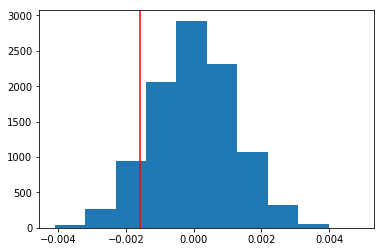

In [30]:
#Distribution under null hypothesis
null_values = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist( null_values)
plt.axvline(obs_diff, color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
p_values = (p_diffs > obs_diff).mean()
p_values

0.90580000000000005

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**It has computed p_diffs(difference in the converted between the two pages) for the 10,000 boot sampling, and have given the proportion of the p_diffs(The p-value) greater than the actual difference observed from the actual dataset. So from this it is clear that the p_value is greater than the threshold value(0.05 or 5%) and hence we have failed to reject the null hypothesis (H0) and there is no significant difference between the page and converted.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])
n_old = len(df2[df2['landing_page'] == 'old_page'])
n_new = len(df2[df2['landing_page'] == 'new_page'])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],alternative='smaller')
print (z_score , p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [35]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)/2))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.905058312759
1.95996398454


Yes, From the calculation of the Z_score and the P_value it is clear that the p_value is greater than the thershold value 0.05 and it have failed to reject the null hypothesis (H0), and it is agreed with the previous finding using the bootsampling for 10000 datas saying there is no significant difference.


** Answer: **

1.We find that the z-score of 1.31092419842 is less than the critical value of 1.95996398454. So, we accept the null hypothesis. 

2.As regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.

3.These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?


**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df2['intercept'] = 1
df2[['ab_page','ba_page']] = pd.get_dummies(df2['group']=='control')
df2 = df2.drop('ba_page',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [39]:
# fix missing chisqprob issue, see https://github.com/statsmodels/statsmodels/issues/3931
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [40]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:               8.077e-06
Time:                        15:39:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?


## Answer:

Our hypothesis here is:

1.$H_{0}$ : $p_{new}$ - $p_{old}$ = 0

2.$H_{1}$ : $p_{new}$ - $p_{old}$ != 0


**The p-value associated with ab_page is 0.190.**

**Since this is greater than 0.05, we interpret this to mean that this analysis fails to reject the null hypothesis that this is a difference in conversion rate based on which page the cusotmer receives.**

**In Part II above, the null hypothesis was that the convesion rate of the old_page was greater than or equal. That explains the difference in p-values since here in Part III we are looking at just equal/not-equal ("two tails" of the probability distribution) where in Part II, we were looking at less-than-or-equals/greater-than ("one tail" of the probability distribution).**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


## Answer:

1.We should consider other factors into the regression model as they might influence the conversions too. For instance student segments [new v/s returning candidates] might create change aversion or even, the opposite as a predisposition to conversion. Seasonality like new terms or New years might mean more interest in new skills/ resolutions. Timestamps are inlcuded but without regionality, they do not indicate if seasonality was a factor or not. [as different countries follow different term and weather patterns.

2.Factors like device on which tests were taken or course which was looked at, prior academic background, age, might alter experience and ultimately, conversions. These are limitations which should be at least kept in mind while making the final decision.

3.Finally : It's a good idea to consider other factors to add to the model because that may help us improve accuracy.

4.The disadvantages to adding additional terms into the regression model is that even with additional factors we can never account for all influencing factors or accomodate them. Plus, small pilots and pivots sometimes work better in practice than long-drawn research without execution.

5.Finally : Adding additional terms does make the analysis more complex and harder to understand. In addition, linear regression models can have problems like a lack of a linear relationship between response and predictor variables, correlated errors, non-constance variance and outliers (leverage points) that hurt the model. Or, the model might exhibit multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [43]:
# Read the countries csv file
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [57]:
# To merge Countries and AB data
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')


In [58]:
### Create the necessary dummy variables
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [59]:
df_new['intercept'] = 1
df_new[['CA','UK','US']]=pd.get_dummies(df_new.country)
df_new[['new_page','old_page']]=pd.get_dummies(df_new.landing_page)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,old_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [60]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [61]:
df_new['intercept'] = 1
log_mod = sm.Logit(df_new.converted,df_new[['intercept','CA','UK','new_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:               2.323e-05
Time:                        16:04:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""


**The p-value for the country dummy variables is greater than our $\alpha$ level of 0.05, so country is not statiscially significant for this model, and while the psuedo $R^2$ value is bigger indicated a better fit the increase does not seem large enough to justify adding the complexity.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [54]:
df_new['CA_new_page'] = df_new.CA * df_new.new_page
df_new['UK_new_page'] = df_new.UK * df_new.new_page
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,old_page,CA_new_page,UK_new_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,0,1


In [55]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new.converted,df_new[['intercept','CA','UK','new_page','CA_new_page','UK_new_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:               3.482e-05
Time:                        15:51:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA             -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK             -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_new_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_new_page     0.0314      0.027      1.181      0.238      -0.021       0.084
===============================================================================
"""


**Adding the interaction variables does not improve the p-value for any of the dummy variables. They are all still less than our $\alpha$ level of 0.05 nor does the addition of the additional complexity significantly improve the psuedo $R^2$ value which indicates that this is not really an imporovement over the previous model.**


## Conclusions
1.The performance of the old page was found better (by miniscule values only) as computed by different techniques.


2.Hence, we accept the Null Hypothesis and Reject the Alternate Hypothesis.


3.These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data. [see part III.f]

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0